In [28]:
import pandas as pd
import numpy as np
import os
from textblob import TextBlob
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 
from sklearn.linear_model import LogisticRegression
#import model_evaluation_utils as meu 
import json
from pandas.io.json import json_normalize

pd.options.display.max_colwidth = 200
%matplotlib inline

In [32]:
pwd

'/Users/Alexandra/Downloads/ultimate_challenge 4'

### Run last cell in notebook in order to have necessary functions defined

In [59]:
#pd.read_json('ultimate_data_challenge.json',lines=True, orient='records')

In [36]:
json.load((open('ultimate_data_challenge.json')))

[{'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'city': "King's Landing",
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'signup_date': '2014-01-25',
  'surge_pct': 15.4,
  'trips_in_first_30_days': 4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2},
 {'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'signup_date': '2014-01-29',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0},
 {'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'signup_date': '2014-01-06',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 3,
  'ultimate_black_user': False,
  'weekday_pct': 100.0},
 {'avg_dist': 2.36,
  'avg_rating_by_driver

In [37]:
data_dict = json.load((open('ultimate_data_challenge.json')))
json_normalize(data_dict)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [38]:
df = pd.DataFrame(json_normalize(data_dict))

In [39]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [50]:
list(df.columns)

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'last_trip_date',
 'phone',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'ultimate_black_user',
 'weekday_pct']

In [40]:
df['avg_dist'].head()

0    3.67
1    8.26
2    0.77
3    2.36
4    3.13
Name: avg_dist, dtype: float64

In [41]:
df['avg_rating_by_driver'].head()

0    5.0
1    5.0
2    5.0
3    4.9
4    4.9
Name: avg_rating_by_driver, dtype: float64

In [48]:
counter_dict = dict(Counter(df['avg_rating_by_driver']))

In [45]:
Counter(df['avg_rating_by_driver'])

Counter({1.0: 181,
         2.0: 126,
         2.5: 31,
         3.0: 602,
         3.2999999999999998: 47,
         3.3999999999999999: 5,
         3.5: 199,
         3.6000000000000001: 19,
         3.7000000000000002: 195,
         3.7999999999999998: 111,
         3.8999999999999999: 41,
         4.0: 1914,
         4.0999999999999996: 125,
         4.2000000000000002: 342,
         4.2999999999999998: 1018,
         4.4000000000000004: 860,
         4.5: 2424,
         4.5999999999999996: 2078,
         4.7000000000000002: 3330,
         4.7999999999999998: 4537,
         4.9000000000000004: 3094,
         5.0: 28508,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan

In [44]:
Counter(type(item) for item in df['avg_rating_by_driver'])

Counter({numpy.float64: 50000})

In [42]:
data_list = list(df['avg_rating_by_driver'].values)

In [57]:
name_list = list(df['avg_rating_by_driver'].index)

In [51]:
data_list

[5.0,
 5.0,
 5.0,
 4.9000000000000004,
 4.9000000000000004,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.9000000000000004,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,
 4.7999999999999998,
 4.7999999999999998,
 5.0,
 3.0,
 5.0,
 5.0,
 5.0,
 4.7000000000000002,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.7999999999999998,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.5,
 5.0,
 4.7999999999999998,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.2000000000000002,
 5.0,
 5.0,
 4.7999999999999998,
 4.7000000000000002,
 5.0,
 5.0,
 5.0,
 4.7999999999999998,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.5,
 5.0,
 5.0,
 4.7999999999999998,
 4.7999999999999998,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.7999999999999998,
 5.0,
 5.0,
 3.0,
 5.0,
 4.9000000000000004,
 4.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 4.0,
 4.7999999999999998,
 4.7000000000000002,
 5.0,
 4.7999999999999998,
 4.9000000000000004,
 4.7000000000000002,
 4.7999999999999998,
 5.0,
 nan,
 5.0,
 4.5,
 4.4000000000000004,
 4.0,
 4.0,
 4.5999999999999996,
 5.0,
 5.0,
 4.9000000000000004,
 5.0,
 5.0,
 4.9000000000

In [54]:
data_list = data_list[0:40]

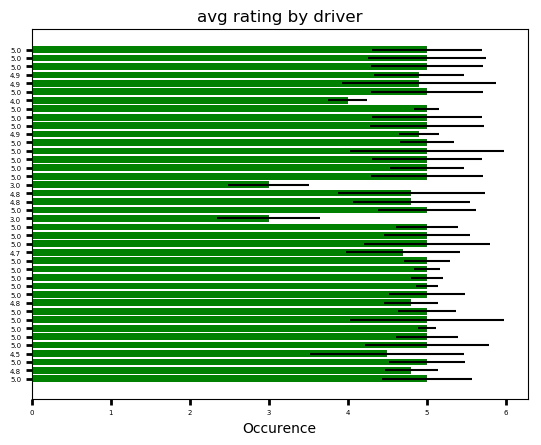

In [56]:
import matplotlib.pyplot as plt
import numpy as np

#plot_list = list(group_names)
# Fixing random state for reproducibility
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(data_list))
error = np.random.rand(len(data_list))
ax.barh(y_pos, data_list, xerr=error, align='center',
        color='green', ecolor='black')
ax.tick_params(direction='out', length=4, width=2, labelsize = 5, colors='black',
               grid_color='r', grid_alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(data_list)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Occurence')
ax.set_title('avg rating by driver')

plt.show()

make a new daframe column if retained or not. been active since last two months?

In [60]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


we are going to assume that the current date is some day in 2014

In [62]:
Counter(type(item) for item in df['last_trip_date'])

Counter({str: 50000})

In [ ]:
#need to convert to datetime

In [64]:
tmstp_list = [pd.to_datetime(item) for item in df['last_trip_date']]

In [71]:
import datetime
d1 = datetime.datetime.now()

In [72]:
d2 = datetime.datetime.now() # after a 5-second or so pause
d2 - d1

datetime.timedelta(0, 1, 513481)

In [107]:
import datetime
# 05/10/09 18:00
d = datetime.datetime(2014, 10, 5, 18, 00)

print(d.year, d.month, d.day, d.hour, d.second)
#2009 10 5 18 0
print(d.isoformat(' '))


2014 10 5 18 0
2014-10-05 18:00:00


In [108]:
tmstp_list[:10]

[Timestamp('2014-06-17 00:00:00'),
 Timestamp('2014-05-05 00:00:00'),
 Timestamp('2014-01-07 00:00:00'),
 Timestamp('2014-06-29 00:00:00'),
 Timestamp('2014-03-15 00:00:00'),
 Timestamp('2014-06-06 00:00:00'),
 Timestamp('2014-01-25 00:00:00'),
 Timestamp('2014-01-29 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-01-05 00:00:00')]

In [109]:
print(type(tmstp_list[0]))

<class 'pandas._libs.tslib.Timestamp'>


In [110]:
print(type(d))

<class 'datetime.datetime'>


In [112]:
print(np.abs(tmstp_list[0]-d))
print(type(tmstp_list[0]-d))

110 days 18:00:00
<class 'pandas._libs.tslib.Timedelta'>


In [118]:
#could use np.abs(item - d).value
delta_list = [np.abs(item - d) for item in tmstp_list]

In [119]:
delta_list

[Timedelta('110 days 18:00:00'),
 Timedelta('153 days 18:00:00'),
 Timedelta('271 days 18:00:00'),
 Timedelta('98 days 18:00:00'),
 Timedelta('204 days 18:00:00'),
 Timedelta('121 days 18:00:00'),
 Timedelta('253 days 18:00:00'),
 Timedelta('249 days 18:00:00'),
 Timedelta('246 days 18:00:00'),
 Timedelta('273 days 18:00:00'),
 Timedelta('128 days 18:00:00'),
 Timedelta('268 days 18:00:00'),
 Timedelta('207 days 18:00:00'),
 Timedelta('119 days 18:00:00'),
 Timedelta('250 days 18:00:00'),
 Timedelta('262 days 18:00:00'),
 Timedelta('99 days 18:00:00'),
 Timedelta('96 days 18:00:00'),
 Timedelta('103 days 18:00:00'),
 Timedelta('124 days 18:00:00'),
 Timedelta('203 days 18:00:00'),
 Timedelta('159 days 18:00:00'),
 Timedelta('156 days 18:00:00'),
 Timedelta('114 days 18:00:00'),
 Timedelta('140 days 18:00:00'),
 Timedelta('275 days 18:00:00'),
 Timedelta('256 days 18:00:00'),
 Timedelta('214 days 18:00:00'),
 Timedelta('119 days 18:00:00'),
 Timedelta('220 days 18:00:00'),
 Timedelta('2

In [120]:
truth_list = [(item > datetime.timedelta(days=200)) for item in delta_list]

In [121]:
Counter(truth_list)

Counter({False: 32769, True: 17231})

In [122]:
Counter([(item == False) for item in truth_list])

Counter({False: 17231, True: 32769})

In [126]:
df['ride_in_past30'] = truth_list
df['retained'] = truth_list

In [127]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,ride_in_past30,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,False,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,True,True
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,False,False
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,True,True


target is 'retained'

### plan: basically we will compose a train test split now on these labels and try to predict tif they were retained or not, look at whats categorical and whats not, try to predict

In [ ]:
y = np.array([str(item) for item in df['retained']])
#make sure that the y is names and not label encoded, but basically only the features need hot encoded 
#features= dummy_features 
feature_list = list(df.columns) #this way we remeber the column names # Convert to numpy array
X_dummies = np.array(dummy_features) #because once we convert to np array it drops the names

### functions:

In [58]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 31 20:05:23 2017
@author: DIP
@Copyright: Dipanjan Sarkar
"""

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    #plt.legend(loc="lower right")
    plt.show()
    
#-------
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
# our pipeline is ready